In [1]:
#@title Imports and random seed
import numpy as np  # Set random seed
random_seed = 42
np.random.seed(random_seed)

# from pathlib import PosixPath
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
#@title Helper function: numeric check
def is_numeric(value):
    try:
        float_value = float(value)
        return True
    except ValueError:
        return False


In [3]:
#@title Generate synthetic Seeds-like dataset
import numpy as np
import pandas as pd

np.random.seed(42)

n_samples_per_class = 70
n_features = 7

# Generate three clusters
cluster_1 = np.random.normal(loc=2.0, scale=0.4, size=(n_samples_per_class, n_features))
cluster_2 = np.random.normal(loc=5.0, scale=0.4, size=(n_samples_per_class, n_features))
cluster_3 = np.random.normal(loc=8.0, scale=0.4, size=(n_samples_per_class, n_features))

X_synthetic = np.vstack([cluster_1, cluster_2, cluster_3])
Y_synthetic = np.array(
    [1]*n_samples_per_class +
    [2]*n_samples_per_class +
    [3]*n_samples_per_class
)

# Create DataFrame identical to your original format
df = pd.DataFrame(X_synthetic, columns=[f'Column_{i+1}' for i in range(7)])
df['Labels'] = Y_synthetic

X = df.iloc[:, 0:7]
Y = df['Labels']


In [ ]:
# #@title Load and clean Seeds dataset
# path = '/content/drive/MyDrive/seeds_dataset.txt'
# data = []

# # Open the file
# with open(path, 'r') as file:
#     # Read the file
#     reader = csv.reader(file, delimiter='\t')  # Specify the delimiter as '\t'

#     # Iterate through each row in the file
#     for row in reader:
#       if len(row) != 8: # Check if row has more than just numbers
#         only_numbers = [value for value in row if is_numeric(value)] # keep only numbers
#         data.append(only_numbers)
#         continue
#       data.append(row)  # keep only the numbers from every row

# # Convert strings to floats in the list of lists
# data = [[float(elem) for elem in sublist] for sublist in data]

# df = pd.DataFrame(data, columns=[f'Column_{i+1}' for i in range(8)])
# df = df.rename(columns={'Column_8': 'Labels'})

# X = df.iloc[:,0:7]
# Y = df['Labels']


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/seeds_dataset.txt'

In [4]:
#@title Distance and similarity matrices
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import pairwise_distances

# Similarity matrix
euclid_matrix = pairwise_distances(X)
cosine_matrix = cosine_similarity(X)


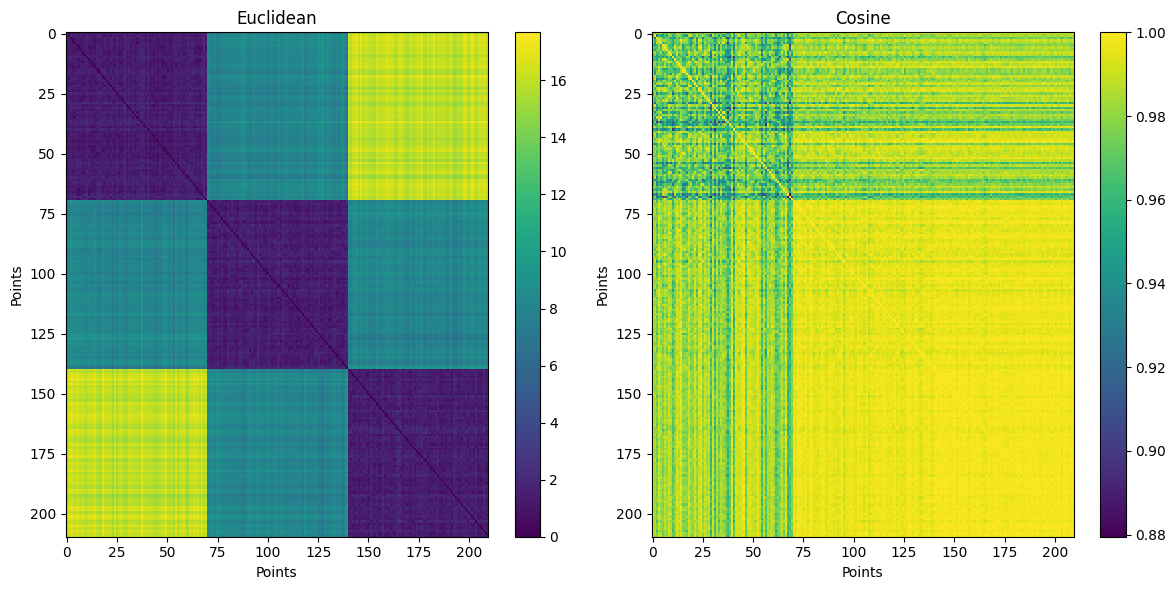

In [5]:
#@title Visualize distance matrices
# Set subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for the first distance matrix
im1 = axs[0].imshow(euclid_matrix, cmap='viridis', interpolation='nearest')
axs[0].set_title('Euclidean')
axs[0].set_xlabel('Points')
axs[0].set_ylabel('Points')
axs[0].grid(False)
axs[0].set_aspect('auto')
plt.colorbar(im1, ax=axs[0])

# Plot for the second distance matrix
im2 = axs[1].imshow(cosine_matrix, cmap='viridis', interpolation='nearest')
axs[1].set_title('Cosine')
axs[1].set_xlabel('Points')
axs[1].set_ylabel('Points')
axs[1].grid(False)
axs[1].set_aspect('auto')
plt.colorbar(im2, ax=axs[1])

plt.tight_layout()
plt.show()


In [6]:
#@title Custom K-Means implementation
from sklearn.metrics import silhouette_score

class KMeans:
    def __init__(self, n_clusters=2, max_iterations=100, distance_metric='euclidean'):
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.centroids = None
        self.distance_metric = distance_metric.lower()

    def distance(self, x, y):
        if self.distance_metric == 'euclidean':
            return np.linalg.norm(x - y)
        elif self.distance_metric == 'squared_euclidean':
            return np.sum((x - y) ** 2)
        elif self.distance_metric == 'cosine':
            dot_product = np.dot(x, y)
            norm_product = np.linalg.norm(x) * np.linalg.norm(y)
            return 1 - dot_product / norm_product
        else:
            raise ValueError("Invalid distance metric. Choose 'euclidean', 'squared_euclidean', or 'cosine'.")

    # Training
    def fit(self, data):
        data_array = data.values if isinstance(data, pd.DataFrame) else data
        idx = np.random.choice(len(data_array), self.n_clusters, replace=False)
        self.centroids = data_array[idx]

        for _ in range(self.max_iterations):
            clusters = [[] for _ in range(self.n_clusters)]
            for point in data_array:
                closest_centroid = np.argmin([self.distance(point, centroid) for centroid in self.centroids])
                clusters[closest_centroid].append(point)

            for i in range(self.n_clusters):
                self.centroids[i] = np.mean(clusters[i], axis=0)

    # Predicting
    def predict(self, data):
        data_array = data.values if isinstance(data, pd.DataFrame) else data
        predictions = []
        for point in data_array:
            closest_centroid = np.argmin([self.distance(point, centroid) for centroid in self.centroids])
            predictions.append(closest_centroid)
        return np.array(predictions)


For n_clusters = 2 , the average silhouette_score is : 0.66
For n_clusters = 3 , the average silhouette_score is : 0.82
For n_clusters = 4 , the average silhouette_score is : 0.40
For n_clusters = 5 , the average silhouette_score is : 0.35
For n_clusters = 6 , the average silhouette_score is : 0.59
For n_clusters = 7 , the average silhouette_score is : 0.34
For n_clusters = 8 , the average silhouette_score is : 0.12
For n_clusters = 9 , the average silhouette_score is : 0.11
For n_clusters = 10, the average silhouette_score is : 0.12


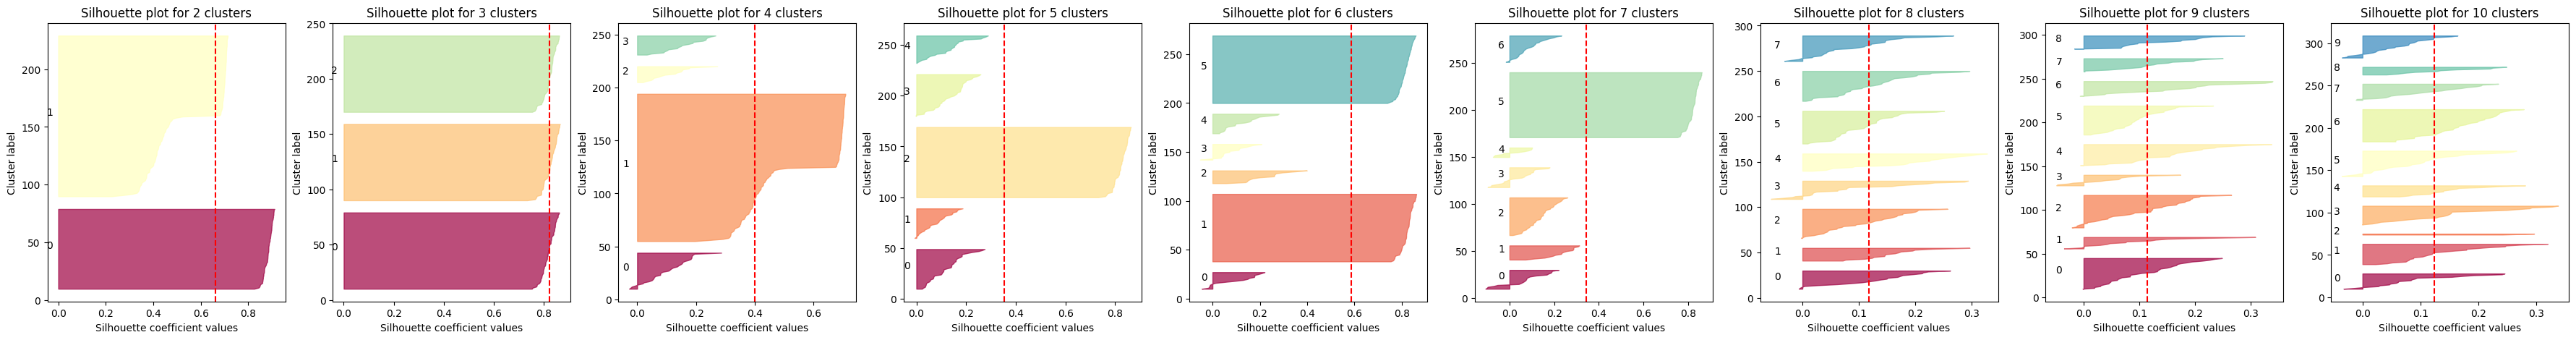

In [7]:
#@title Silhouette analysis (Squared Euclidean)
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

plt.figure(figsize=(len(range_n_clusters) * 5, 5))

for i, n_clusters in enumerate(range_n_clusters, 1):
    plt.subplot(1, len(range_n_clusters), i)

    kmeans = KMeans(n_clusters=n_clusters, distance_metric='squared_euclidean')
    kmeans.fit(X)
    cluster_labels = kmeans.predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels, metric='seuclidean')
    print(f"For n_clusters = {n_clusters:<2}, the average silhouette_score is : {silhouette_avg:.2f}")

    sample_silhouette_values = silhouette_samples(X, cluster_labels, metric='seuclidean')

    y_lower = 10
    for j in range(n_clusters):
        jth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
        jth_cluster_silhouette_values.sort()

        size_cluster_j = jth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = cm.Spectral(float(j) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, jth_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        y_lower = y_upper + 10

    plt.title(f"Silhouette plot for {n_clusters} clusters")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.show()


In [8]:
#@title Normalize data for cosine distance
X_normalized = X.apply(lambda row: row.div(np.sqrt(np.sum(row**2))), axis=1)


For n_clusters = 2 , the average silhouette_score is : 0.27
For n_clusters = 3 , the average silhouette_score is : 0.29
For n_clusters = 4 , the average silhouette_score is : 0.30
For n_clusters = 5 , the average silhouette_score is : 0.13
For n_clusters = 6 , the average silhouette_score is : 0.23
For n_clusters = 7 , the average silhouette_score is : 0.07
For n_clusters = 8 , the average silhouette_score is : 0.32
For n_clusters = 9 , the average silhouette_score is : 0.13
For n_clusters = 10, the average silhouette_score is : 0.26


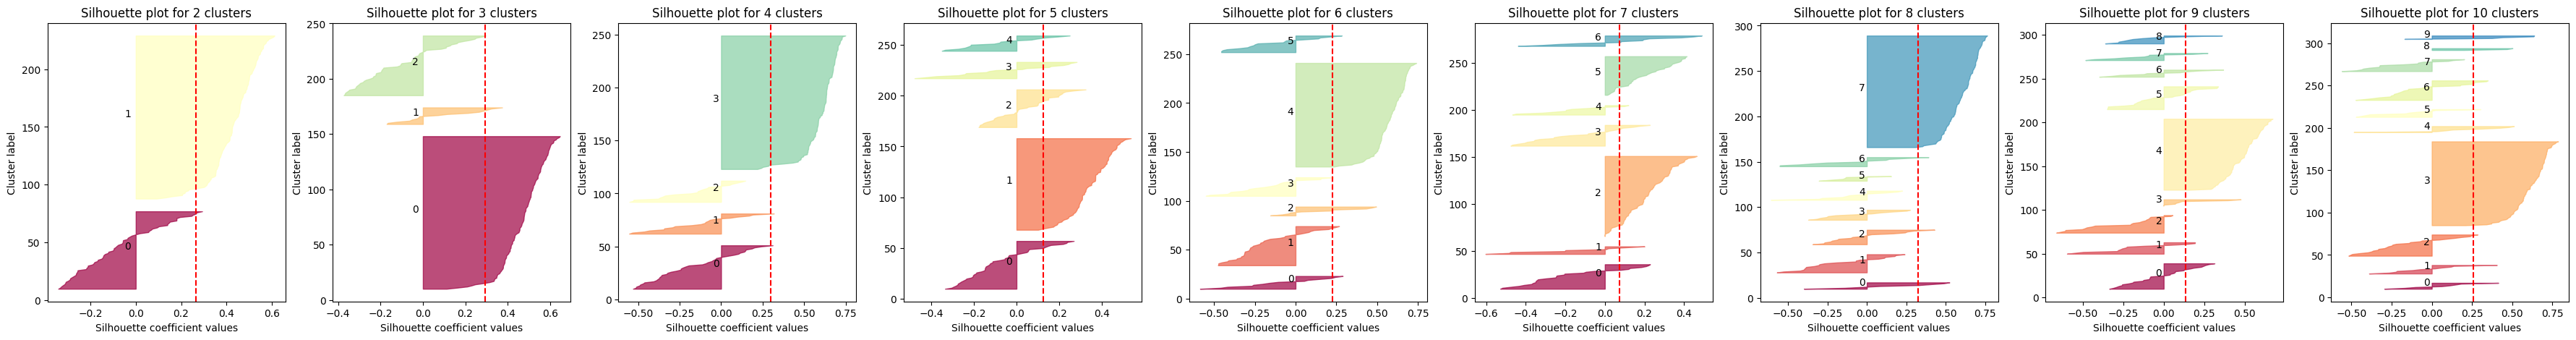

In [9]:
#@title Silhouette analysis (Cosine distance)
plt.figure(figsize=(len(range_n_clusters) * 5, 5))

for i, n_clusters in enumerate(range_n_clusters, 1):
    plt.subplot(1, len(range_n_clusters), i)

    kmeans = KMeans(n_clusters=n_clusters, distance_metric='cosine')
    kmeans.fit(X_normalized)
    cluster_labels = kmeans.predict(X_normalized)

    silhouette_avg = silhouette_score(X_normalized, cluster_labels, metric='cosine')
    print(f"For n_clusters = {n_clusters:<2}, the average silhouette_score is : {silhouette_avg:.2f}")

    sample_silhouette_values = silhouette_samples(X_normalized, cluster_labels, metric='cosine')

    y_lower = 10
    for j in range(n_clusters):
        jth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
        jth_cluster_silhouette_values.sort()

        size_cluster_j = jth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = cm.Spectral(float(j) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, jth_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        y_lower = y_upper + 10

    plt.title(f"Silhouette plot for {n_clusters} clusters")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.show()


In [10]:
#@title Rand Index evaluation (Squared Euclidean)
from sklearn.metrics import rand_score

lists_of_RI = []
for iter in range(5):
    kmeans = KMeans(n_clusters=3, max_iterations=100, distance_metric='squared_euclidean')
    kmeans.fit(X)

    cluster_assignment = kmeans.predict(X)
    RI = rand_score(Y, cluster_assignment)
    lists_of_RI.append(RI)

print(f'{"Mean Rand Index":^37}')
print(f'{"Squared Euclidean":^16}  {np.array(lists_of_RI).mean():.2f}')


           Mean Rand Index           
Squared Euclidean  0.94


In [11]:
#@title Rand Index evaluation (Cosine distance)
lists_of_RI = []
for iter in range(5):
    kmeans = KMeans(n_clusters=3, max_iterations=100, distance_metric='cosine')
    kmeans.fit(X_normalized)

    cluster_assignment = kmeans.predict(X_normalized)
    RI = rand_score(Y, cluster_assignment)
    lists_of_RI.append(RI)

print(f'{"Mean Rand Index":^37}')
print(f'{"Cosine":^16}  {np.array(lists_of_RI).mean():.2f}')


           Mean Rand Index           
     Cosine       0.53
